## Imports

In [1]:
#%pip install --user adjustText

In [2]:
from adjustText import adjust_text
import numpy as np
from pyproj import Proj
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import json
from matplotlib.colors import LogNorm
with open('PB2002_boundaries.json', 'r') as f:
    plate_boundaries = json.load(f)

## Load in Stations & Coinciding Info

In [70]:

stations = [{"id": "J18B", "lat": 44.0, "lon": -125.5, "tremors": 835, "start_year": 2012, "depth": 3047},
            {"id": "J10B", "lat": 43.3, "lon": -125.5, "tremors": 811, "start_year": 2012, "depth": 3093},
            {"id": "G34B", "lat": 42.6, "lon": -125.2, "tremors": 84, "start_year": 2012, "depth": 2954},
            {"id": "G26B", "lat": 41.9, "lon": -125.2, "tremors": 25, "start_year": 2012, "depth": 2357},
            {"id": "J67C", "lat": 48.2, "lon": -127.1, "tremors": 155, "start_year": 2013, "depth": 2581},
            {"id": "J26C", "lat": 44.7, "lon": -125.5, "tremors": 1, "start_year": 2013, "depth": 2868},
            {"id": "J34C", "lat": 45.3, "lon": -125.4, "tremors": 7, "start_year": 2013, "depth": 2580},
            {"id": "J51C", "lat": 46.8, "lon": -126.2, "tremors": 0, "start_year": 2013, "depth": 2626},
            {"id": "J10D", "lat": 43.3, "lon": -125.5, "tremors": 1301, "start_year": 2014, "depth": 3085},
            {"id": "J26D", "lat": 44.7, "lon": -125.5, "tremors": 1056, "start_year": 2014, "depth": 2880},
            {"id": "J18D", "lat": 43.9, "lon": -125.5, "tremors": 1165, "start_year": 2014, "depth": 3050},
            {"id": "G34D", "lat": 42.6, "lon": -125.4, "tremors": 135, "start_year": 2014, "depth": 3089},
            {"id": "G26D", "lat": 41.9, "lon": -125.3, "tremors": 25, "start_year": 2014, "depth": 3104},
            {"id": "G18D", "lat": 41.3, "lon": -125.3, "tremors": 1, "start_year": 2014, "depth": 3130},
            {"id": "NCBC", "lat": 48.4, "lon": -126.2, "tremors": 1, "start_year": 2009, "depth": 398},
            {"id": "NC89", "lat": 48.75, "lon": -126.9, "tremors": 70, "start_year": 2009, "depth": 1258},
            {"id": "M01C", "lat": 49.2, "lon": -126.7, "tremors": 0, "start_year": 2013, "depth": 138},
            {"id": "J73C", "lat": 48.8, "lon": -126.2, "tremors": 0, "start_year": 2013, "depth": 133},
            {"id": "M02C", "lat": 48.3, "lon": -125.6, "tremors": 21, "start_year": 2013, "depth": 141},
            {"id": "M03C", "lat": 47.9, "lon": -125.1, "tremors": 3998, "start_year": 2013, "depth": 1839},
            {"id": "M04C", "lat": 47.6, "lon": -125.2, "tremors": 16, "start_year": 2013, "depth": 570},
            {"id": "J65C", "lat": 48.0, "lon": -125.1, "tremors": 1714, "start_year": 2013, "depth": 169},
            {"id": "J59C", "lat": 47.5, "lon": -126.4, "tremors": 3, "start_year": 2013, "depth": 2389},
            {"id": "J58C", "lat": 47.3, "lon": -125.5, "tremors": 900, "start_year": 2013, "depth": 1527},
            {"id": "FN16C", "lat": 46.8, "lon": -125.53, "tremors": 0, "start_year": 2013, "depth": 1728},
            {"id": "FN11C", "lat": 46.8, "lon": -125.1, "tremors": 1, "start_year": 2013, "depth": 691},
            {"id": "FN17C", "lat": 46.7, "lon": -125.0, "tremors": 0, "start_year": 2013, "depth": 1015},
            {"id": "J49C", "lat": 46.4, "lon": -124.4, "tremors": 0, "start_year": 2013, "depth": 113},
            {"id": "M05C", "lat": 46.2, "lon": -124.9, "tremors": 2456, "start_year": 2013, "depth": 837},
            {"id": "J42C", "lat": 45.9, "lon": -125.3, "tremors": 10, "start_year": 2013, "depth": 1550},
            {"id": "J41C", "lat": 45.8, "lon": -124.5, "tremors": 7, "start_year": 2013, "depth": 171},
            {"id": "M06C", "lat": 45.5, "lon": -124.9, "tremors": 378, "start_year": 2013, "depth": 1460},
            {"id": "J33B", "lat": 45.1, "lon": -124.6, "tremors": 36, "start_year": 2012, "depth": 350},
            {"id": "M07C", "lat": 44.9, "lon": -125.1, "tremors": 0, "start_year": 2013, "depth": 1365},
            {"id": "M18B", "lat": 44.9, "lon": -125.0, "tremors": 0, "start_year": 2012, "depth": 720},
            {"id": "FC03D", "lat": 44.8, "lon": -124.7, "tremors": 1, "start_year": 2014, "depth": 432},
            {"id": "J25C", "lat": 44.5, "lon": -124.6, "tremors": 0, "start_year": 2013, "depth": 144},
            {"id": "J25B", "lat": 44.5, "lon": -124.6, "tremors": 1, "start_year": 2012, "depth": 147},
            {"id": "J25D", "lat": 44.5, "lon": -124.6, "tremors": 0, "start_year": 2014, "depth": 136},
            {"id": "M09B", "lat": 44.2, "lon": -125.1, "tremors": 8, "start_year": 2012, "depth": 914},
            {"id": "M08C", "lat": 44.1, "lon": -124.9, "tremors": 14, "start_year": 2013, "depth": 131},
            {"id": "J17D", "lat": 43.8, "lon": -124.6, "tremors": 12, "start_year": 2014, "depth": 285},
            {"id": "M10B", "lat": 43.6, "lon": -125.0, "tremors": 0, "start_year": 2012, "depth": 675},
            {"id": "M13D", "lat": 43.6, "lon": -125.0, "tremors": 0, "start_year": 2014, "depth": 990},
            {"id": "J09B", "lat": 43.2, "lon": -124.7, "tremors": 12, "start_year": 2012, "depth": 252},
            {"id": "M11B", "lat": 42.9, "lon": -125.0, "tremors": 6367, "start_year": 2012, "depth": 1109},
            {"id": "M14D", "lat": 42.6, "lon": -125.0, "tremors": 13, "start_year": 2014, "depth": 997},
            {"id": "G33D", "lat": 42.7, "lon": -124.8, "tremors": 7201, "start_year": 2014, "depth": 686},
            {"id": "G33B", "lat": 42.5, "lon": -124.7, "tremors": 0, "start_year": 2012, "depth": 213},
            {"id": "M15D", "lat": 42.2, "lon": -124.9, "tremors": 0, "start_year": 2014, "depth": 933},
            {"id": "M12B", "lat": 42.2, "lon": -124.9, "tremors": 15632, "start_year": 2012, "depth": 1045},
            {"id": "G25B", "lat": 41.9, "lon": -124.6, "tremors": 17, "start_year": 2012, "depth": 430},
            {"id": "M13B", "lat": 41.7, "lon": -124.9, "tremors": 0, "start_year": 2012, "depth": 909},
            {"id": "M16D", "lat": 41.7, "lon": -124.8, "tremors": 0, "start_year": 2014, "depth": 882},
            {"id": "G18B", "lat": 41.3, "lon": -124.9, "tremors": 71, "start_year": 2012, "depth": 1464},
            {"id": "G17D", "lat": 41.4, "lon": -124.4, "tremors": 0, "start_year": 2014, "depth": 99},
            {"id": "G17B", "lat": 41.3, "lon": -124.3, "tremors": 36, "start_year": 2012, "depth": 123},
            {"id": "M17D", "lat": 41.0, "lon": -124.6, "tremors": 9, "start_year": 2014, "depth": 749},
            {"id": "M14B", "lat": 41.0, "lon": -124.6, "tremors": 838, "start_year": 2012, "depth": 638},
            {"id": "BACME", "lat": 48.3, "lon": -126.1, "tremors": 43, "start_year": 2016, "depth": 897},
            {"id": "BACND", "lat": 48.3, "lon": -126.2, "tremors": 0, "start_year": 2018, "depth": 643},
            {"id": "CQS64", "lat": 48.7, "lon": -126.9, "tremors": 5151, "start_year": 2016, "depth": 1323},
            {"id": "FN13C", "lat": 47.0, "lon": -125.3, "tremors": 4010, "start_year": 2013, "depth": 1764},
            {"id": "FN12C", "lat": 46.9, "lon": -125.1, "tremors": 0, "start_year": 2013, "depth": 656},
            {"id": "FN14C", "lat": 47.0, "lon": -125.0, "tremors": 3, "start_year": 2013, "depth": 173},
            {"id": "FN10C", "lat": 46.9, "lon": -125.0, "tremors": 175, "start_year": 2013, "depth": 811},
            {"id": "FN08C", "lat": 46.9, "lon": -124.9, "tremors": 0, "start_year": 2013, "depth": 176},
            {"id": "FN09C", "lat": 46.8, "lon": -124.9, "tremors": 0, "start_year": 2013, "depth": 198},
            {"id": "FN07C", "lat": 46.9, "lon": -124.8, "tremors": 1, "start_year": 2013, "depth": 158},
            {"id": "FN06C", "lat": 46.9, "lon": -124.7, "tremors": 0, "start_year": 2013, "depth": 137},
            {"id": "FN04C", "lat": 46.9, "lon": -124.6, "tremors": 89, "start_year": 2013, "depth": 104},
            {"id": "FN03C", "lat": 46.9, "lon": -124.5, "tremors": 11, "start_year": 2013, "depth": 93},
            {"id": "FN05C", "lat": 46.9, "lon": -124.7, "tremors": 15, "start_year": 2013, "depth": 123},
            {"id": "J57C", "lat": 47.1, "lon": -124.5, "tremors": 0, "start_year": 2013, "depth": 67},
            {"id": "FN02C", "lat": 46.9, "lon": -124.4, "tremors": 31, "start_year": 2013, "depth": 67},
            {"id": "FN01C", "lat": 46.9, "lon": -124.3, "tremors": 0, "start_year": 2013, "depth": 56},
            {"id": "FN19C", "lat": 46.7, "lon": -124.4, "tremors": 183, "start_year": 2013, "depth": 72},
            {"id": "FN17C", "lat": 46.7, "lon": -125.0, "tremors": 0, "start_year": 2013, "depth": 1015},
            {"id": "FN18C", "lat": 46.7, "lon": -124.7, "tremors": 1, "start_year": 2013, "depth": 166}]
print(len(stations))
print(len([s for s in stations if s["start_year"] == 2014]))

79
16


55157


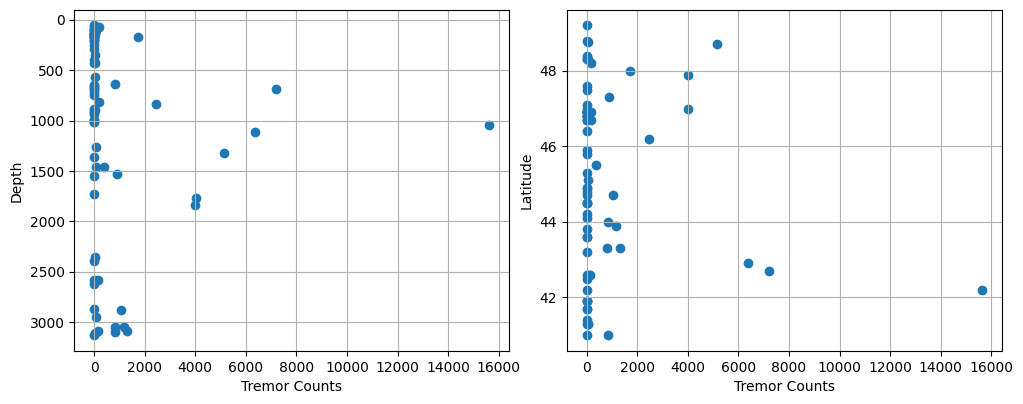

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
fig.tight_layout()


depth = [s["depth"] for s in stations]
tremor = [s["tremors"] for s in stations]
lat = [s["lat"] for s in stations]
print(sum(tremor))

# Tremor vs Depth
ax[0].scatter(tremor, depth)
ax[0].invert_yaxis()
ax[0].set_xlabel('Tremor Counts')
ax[0].set_ylabel('Depth')
#ax[0].set_xlim(-10, 350)
ax[0].grid()

# Tremor vs Latitude
ax[1].scatter(tremor, lat)
ax[1].set_xlabel('Tremor Counts')
ax[1].set_ylabel('Latitude')
#ax[1].set_xlim(-10, 350)
ax[1].grid()

## Make Map

comment and uncomment based on what you want the stations to be colored by (tremor or years)

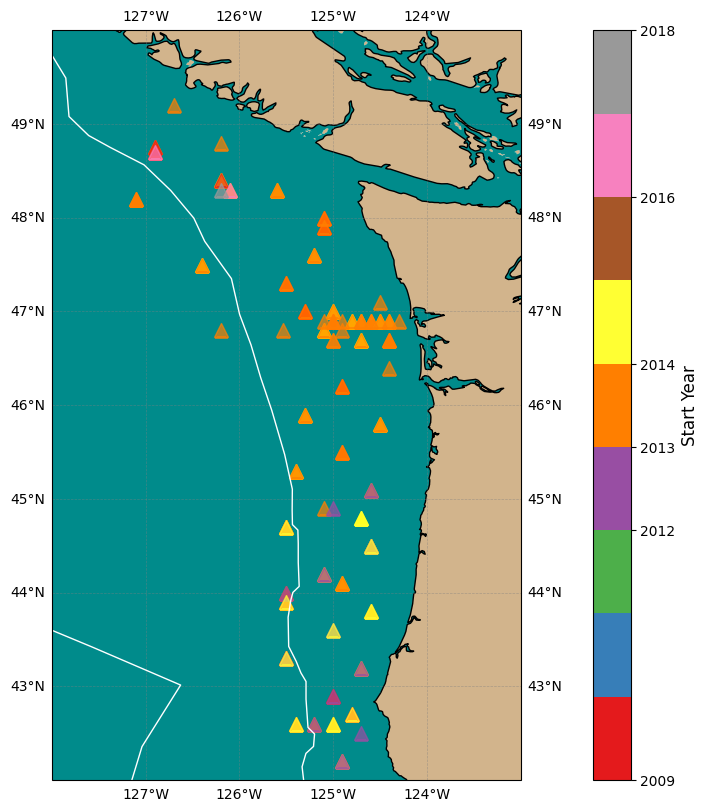

In [73]:
# initalize map
fig = plt.figure(figsize=[8,8],constrained_layout=True)
ax=fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-128, -123, 42, 50], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

ax.add_feature(cfeature.LAND, facecolor='tan') 
ax.add_feature(cfeature.OCEAN, facecolor='darkcyan')
ax.coastlines()


### TREMOR VALUES ###
'''
# get tremor values
tremor_values = [s["tremors"] for s in stations if s["tremors"] is not None and s["tremors"] > 0]
norm_t = LogNorm(vmin=min(tremor_values), vmax=max(tremor_values))
cmap_t = plt.colormaps['autumn_r']


# colorbaaa based on tremor values
sm = ScalarMappable(norm=norm_t, cmap=cmap_t)
sm.set_array([]) # dummy array
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Tremor Count')

for station in stations:
    tremor = station["tremors"]
    if tremor is None or tremor <= 0:
        color = "lightgray"  # neutral color for no data or zero tremors
    else:
        color = cmap_t(norm_t(tremor))
    ax.plot(station["lon"], station["lat"], marker='^', color=color, markersize=10, alpha = 0.7, transform=ccrs.PlateCarree())
    #ax.text(station["lon"] + 0.05, station["lat"] + 0.05, station["id"], fontsize=5, transform=ccrs.PlateCarree())


'''
# loop through stations
for station in stations:
    color = cmap_t(norm_t(station["tremors"]))
    ax.plot(station["lon"], station["lat"], marker='^', color= color, markersize=10, transform=ccrs.PlateCarree())
    #ax.text(station["lon"] + 0.05, station["lat"] + 0.05, station["id"], fontsize=10, transform=ccrs.PlateCarree())

### START YEAR
# get start years
start_year = [s["start_year"] for s in stations]
norm_s = colors.Normalize(vmin=min(start_year), vmax=max(start_year))
cmap_s = plt.colormaps['Set1']

# colorbaaa based on years
sm = ScalarMappable(norm=norm_s, cmap=cmap_s)
sm.set_array([]) # dummy array
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.ax.set_ylabel('Start Year', fontsize=12)

# just one tick for each year
years = sorted(set(start_year)) 
cbar.set_ticks(years)

#texts = []

# loop through stations
for station in stations:
    color = cmap_s(norm_s(station["start_year"]))
    ax.plot(station["lon"], station["lat"], marker='^', color= color, markersize=10, alpha = 0.7, transform=ccrs.PlateCarree())
    #ax.text(station["lon"] + 0.05, station["lat"] + 0.05, station["id"], fontsize=10, transform=ccrs.PlateCarree())
    #texts.append(ax.text(station["lon"], station["lat"], station["id"], fontsize=8, transform=ccrs.PlateCarree()))

#adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='black'))
# Plot Tectonic Plate Boundaries
for feature in plate_boundaries['features']:
    coords = feature['geometry']['coordinates']
    if feature['geometry']['type'] == 'LineString':
        lons, lats = zip(*coords)
        ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())
    elif feature['geometry']['type'] == 'MultiLineString':
        for line in coords:
            lons, lats = zip(*line)
            ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())

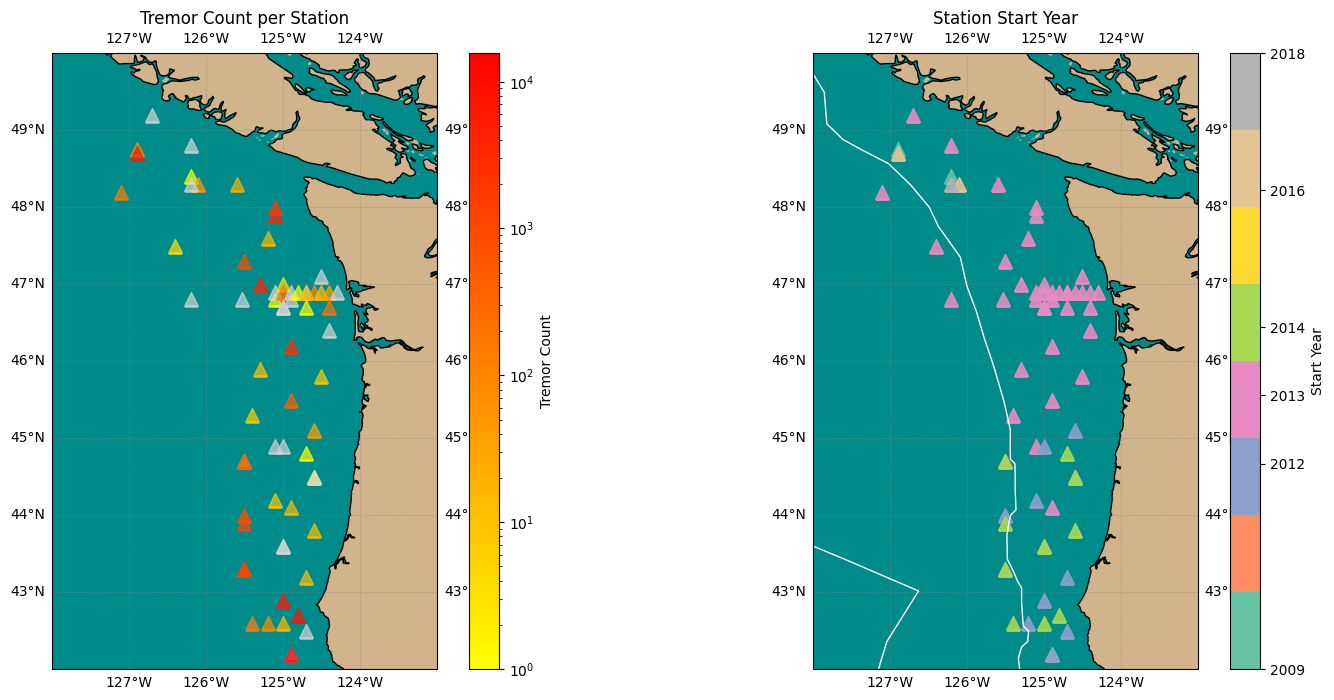

In [83]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import ScalarMappable

# Extract tremor and start year values
tremor_values = [s["tremors"] for s in stations if s["tremors"] is not None and s["tremors"] > 0]
start_years = [s["start_year"] for s in stations]

# Normalize and colormaps
norm_t = LogNorm(vmin=min(tremor_values), vmax=max(tremor_values))
cmap_t = plt.colormaps['autumn_r']

norm_s = Normalize(vmin=min(start_years), vmax=max(start_years))
cmap_s = plt.colormaps['Set2']

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [-128, -123, 42, 50]

for ax in axes:
    ax.set_extent(extent)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.LAND, facecolor='tan')
    ax.add_feature(cfeature.OCEAN, facecolor='darkcyan')
    ax.coastlines()

# Left: Tremor Count
for station in stations:
    tremor = station["tremors"]
    color = cmap_t(norm_t(tremor)) if tremor and tremor > 0 else "lightgray"
    axes[0].plot(station["lon"], station["lat"], marker='^', color=color, markersize=10, alpha=0.7)

sm_t = ScalarMappable(norm=norm_t, cmap=cmap_t)
sm_t.set_array([])
cbar_t = plt.colorbar(sm_t, ax=axes[0], orientation='vertical', label='Tremor Count')
axes[0].set_title("Tremor Count per Station")

# Right: Start Year
for station in stations:
    color = cmap_s(norm_s(station["start_year"]))
    axes[1].plot(station["lon"], station["lat"], marker='^', color=color, markersize=10, alpha=0.9)

sm_s = ScalarMappable(norm=norm_s, cmap=cmap_s)
sm_s.set_array([])
cbar_s = plt.colorbar(sm_s, ax=axes[1], orientation='vertical')
cbar_s.set_ticks(sorted(set(start_years)))
cbar_s.ax.set_ylabel('Start Year')
axes[1].set_title("Station Start Year")


for feature in plate_boundaries['features']:
    coords = feature['geometry']['coordinates']
    if feature['geometry']['type'] == 'LineString':
        lons, lats = zip(*coords)
        ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())
    elif feature['geometry']['type'] == 'MultiLineString':
        for line in coords:
            lons, lats = zip(*line)
            ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())

#plt.tight_layout()
plt.show()